In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [104]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.svm import SVC
from sklearn import tree

In [3]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder

In [4]:
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix

In [5]:
import warnings
warnings.filterwarnings('ignore')

In [6]:
df = pd.read_csv('Loan_Modelling.csv')

In [7]:
df.drop('ID',axis=1,inplace = True)

In [8]:
df.head()

,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 5000 non-null   int64  
 1   Experience          5000 non-null   int64  
 2   Income              5000 non-null   int64  
 3   ZIPCode             5000 non-null   int64  
 4   Family              5000 non-null   int64  
 5   CCAvg               5000 non-null   float64
 6   Education           5000 non-null   int64  
 7   Mortgage            5000 non-null   int64  
 8   Personal_Loan       5000 non-null   int64  
 9   Securities_Account  5000 non-null   int64  
 10  CD_Account          5000 non-null   int64  
 11  Online              5000 non-null   int64  
 12  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(12)
memory usage: 507.9 KB


In [10]:
df['ZIPCode'].nunique()

467

In [11]:
df['ZIPCode'].value_counts()

94720    169
94305    127
95616    116
90095     71
93106     57
        ... 
96145      1
94087      1
91024      1
93077      1
94598      1
Name: ZIPCode, Length: 467, dtype: int64

In [12]:
for col in df.columns:
    if col == 'ZIPCode':
        continue
    print(col)
    print('*'*20)
    print(df[col].unique())
    print()

Age
********************
[25 45 39 35 37 53 50 34 65 29 48 59 67 60 38 42 46 55 56 57 44 36 43 40
 30 31 51 32 61 41 28 49 47 62 58 54 33 27 66 24 52 26 64 63 23]

Experience
********************
[ 1 19 15  9  8 13 27 24 10 39  5 23 32 41 30 14 18 21 28 31 11 16 20 35
  6 25  7 12 26 37 17  2 36 29  3 22 -1 34  0 38 40 33  4 -2 42 -3 43]

Income
********************
[ 49  34  11 100  45  29  72  22  81 180 105 114  40 112 130 193  21  25
  63  62  43 152  83 158  48 119  35  41  18  50 121  71 141  80  84  60
 132 104  52 194   8 131 190  44 139  93 188  39 125  32  20 115  69  85
 135  12 133  19  82 109  42  78  51 113 118  64 161  94  15  74  30  38
   9  92  61  73  70 149  98 128  31  58  54 124 163  24  79 134  23  13
 138 171 168  65  10 148 159 169 144 165  59  68  91 172  55 155  53  89
  28  75 170 120  99 111  33 129 122 150 195 110 101 191 140 153 173 174
  90 179 145 200 183 182  88 160 205 164  14 175 103 108 185 204 154 102
 192 202 162 142  95 184 181 143 123 178 198 20

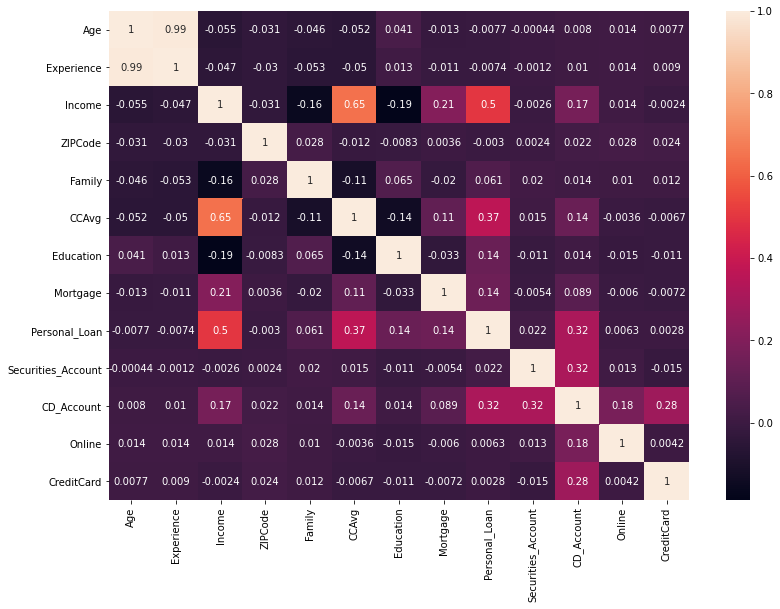

In [13]:
plt.figure(figsize=(13,9))
sns.heatmap(df.corr(),annot=True)

In [14]:
sns.set_style('whitegrid')

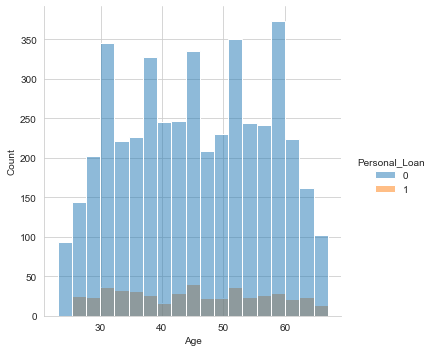

In [15]:
sns.displot(x='Age',data=df,hue='Personal_Loan')

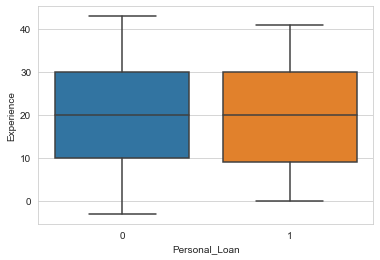

In [16]:
sns.boxplot(x='Personal_Loan',y='Experience',data=df)

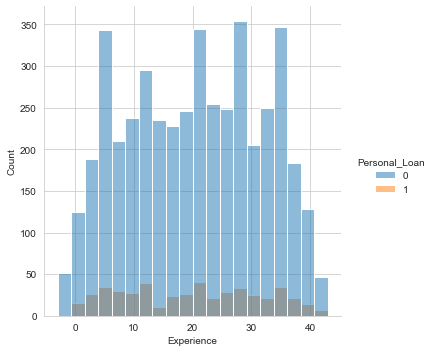

In [17]:
sns.displot(x='Experience',data=df,hue='Personal_Loan')

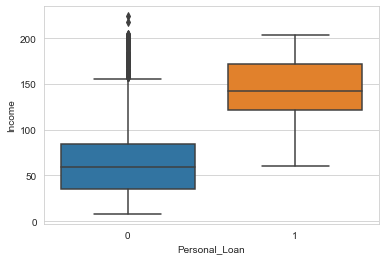

In [18]:
sns.boxplot(x='Personal_Loan',y='Income',data=df)

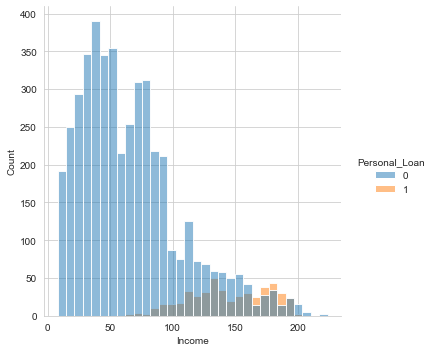

In [19]:
sns.displot(x='Income',data=df,hue='Personal_Loan')

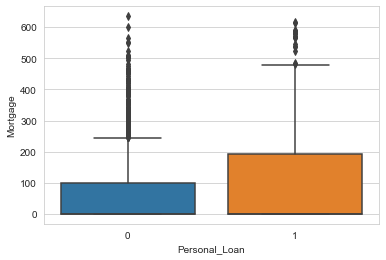

In [20]:
sns.boxplot(x='Personal_Loan',y='Mortgage',data=df)

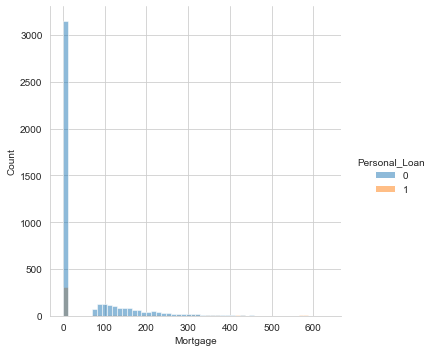

In [21]:
sns.displot(x='Mortgage',data=df,hue='Personal_Loan')

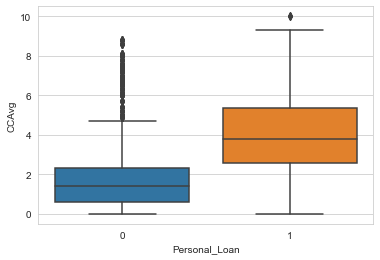

In [22]:
sns.boxplot(x='Personal_Loan',y='CCAvg',data=df)

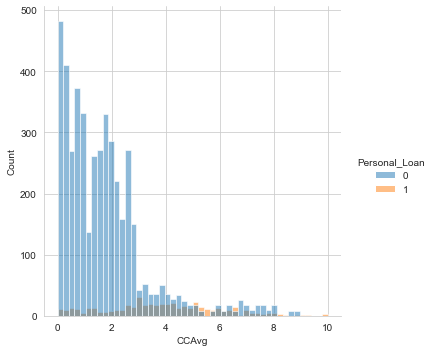

In [23]:
sns.displot(x='CCAvg',data=df,hue='Personal_Loan')

In [24]:
df.columns

Index(['Age', 'Experience', 'Income', 'ZIPCode', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal_Loan', 'Securities_Account',
       'CD_Account', 'Online', 'CreditCard'],
      dtype='object')

In [25]:
cat_cols = ['Family', 'Education', 'Securities_Account', 'CD_Account', 'Online', 'CreditCard']

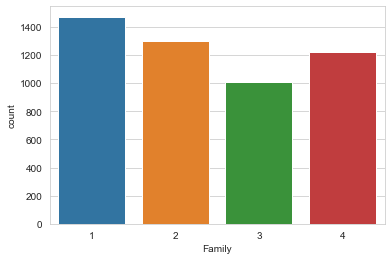

In [26]:
sns.countplot(x='Family',data=df)

In [27]:
df.groupby('Personal_Loan')['Family'].value_counts()

Personal_Loan  Family
0              1         1365
               2         1190
               4         1088
               3          877
1              4          134
               3          133
               1          107
               2          106
Name: Family, dtype: int64

In [28]:
df['Personal_Loan'].value_counts()

0    4520
1     480
Name: Personal_Loan, dtype: int64

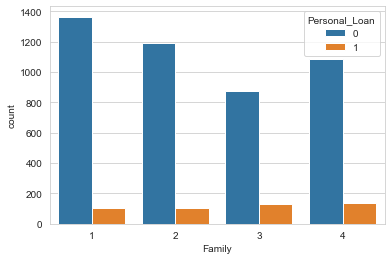

In [29]:
sns.countplot(x='Family',data=df,hue='Personal_Loan')

In [30]:
100* (107/(1365+107))

7.2690217391304355

In [31]:
100*(106/(106+1190))

8.179012345679013

In [32]:
100*(133/(133+877))

13.16831683168317

In [33]:
100*(134/(134+1088))

10.965630114566286

In [34]:
100*480/5000

9.6

In [35]:
len(cat_cols)

6

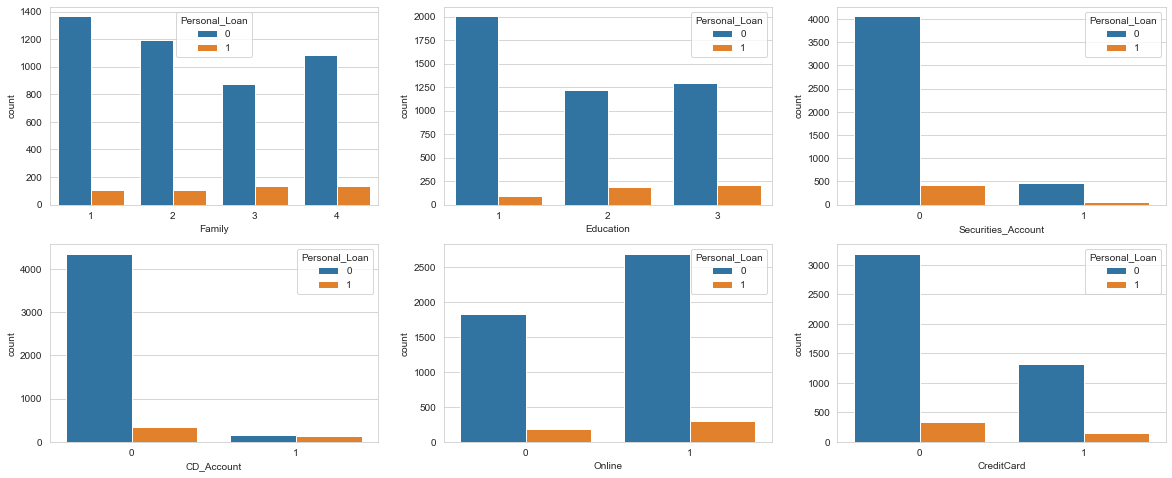

In [36]:
plt.figure(figsize=(20,8))
for indx,cat in enumerate(cat_cols):
    plt.subplot(2,3,indx+1)
    sns.countplot(x=cat,data=df,hue='Personal_Loan')

In [37]:
df1 = df.drop('ZIPCode',axis=1)

In [38]:
df1.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,25,1,49,4,1.6,1,0,0,1,0,0,0
1,45,19,34,3,1.5,1,0,0,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,0,1


In [39]:
xtrain1, xtest1, ytrain1, ytest1 = train_test_split(df1.drop('Personal_Loan',axis=1), df1['Personal_Loan'], test_size=0.3, random_state=50)

In [40]:
xtrain1.shape

(3500, 11)

In [41]:
xtest1.shape

(1500, 11)

### Sasta wala tareeka

In [42]:
model_log = LogisticRegression().fit(xtrain1, ytrain1)
model_knn = KNeighborsClassifier().fit(xtrain1, ytrain1)
model_dt = DecisionTreeClassifier().fit(xtrain1, ytrain1)
model_rf = RandomForestClassifier().fit(xtrain1, ytrain1)
model_bag = BaggingClassifier().fit(xtrain1, ytrain1)
model_svm = SVC().fit(xtrain1, ytrain1)

In [43]:
print('Logistic Reg. Test Score:     ',round(100* model_log.score(xtest1,ytest1),2),'%')
print('KNN Test Score:               ',round(100* model_knn.score(xtest1,ytest1),2),'%')
print('Decision Tree Test Score:     ',round(100* model_dt.score(xtest1,ytest1),2),'%')
print('Random Forest Test Score:     ',round(100* model_rf.score(xtest1,ytest1),2),'%')
print('Bagging Classifier Test Score:',round(100* model_bag.score(xtest1,ytest1),2),'%')
print('SVM Test Score:               ',round(100* model_svm.score(xtest1,ytest1),2),'%')

Logistic Reg. Test Score:      94.4 %
KNN Test Score:                91.4 %
Decision Tree Test Score:      97.47 %
Random Forest Test Score:      97.8 %
Bagging Classifier Test Score: 97.73 %
SVM Test Score:                90.73 %


### Optimized Machine Learning

In [44]:
# Elbow Method
scores = [100*(KNeighborsClassifier(n_neighbors=i).fit(xtrain1, ytrain1).score(xtest1,ytest1)) for i in range(1,100,3)]

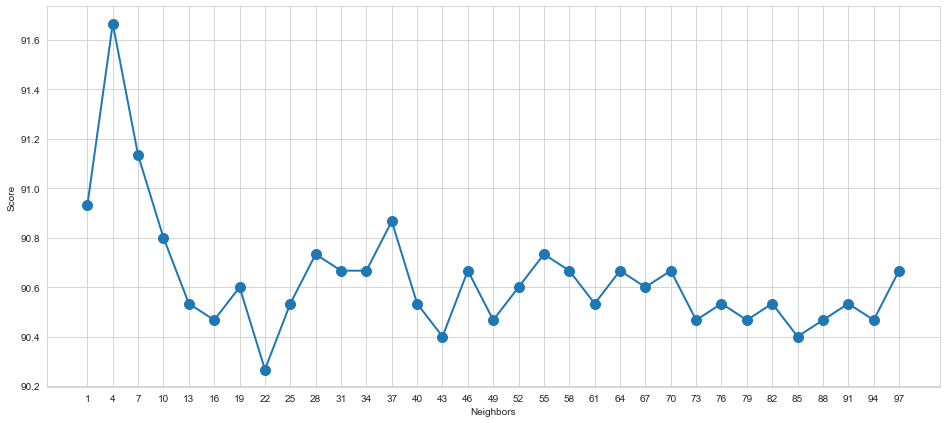

In [45]:
plt.figure(figsize=(16,7))
plt.plot(range(1,100,3), scores, lw=2, marker='o',markersize=10)
plt.xlabel('Neighbors')
plt.ylabel('Score')
plt.xticks(range(1,100,3))
# plt.yticks(range(0,101,5))
plt.show()

We are not satisfied with KNN as of now

In [46]:
df2 = df1.copy()

In [47]:
df2.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,25,1,49,4,1.6,1,0,0,1,0,0,0
1,45,19,34,3,1.5,1,0,0,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,0,1


In [48]:
x2 = df2.drop(['Personal_Loan','Experience'],axis=1)
y2 = df2['Personal_Loan']

In [49]:
x2['Family'].unique()

array([4, 3, 1, 2], dtype=int64)

In [50]:
x2.head()

,Age,Income,Family,CCAvg,Education,Mortgage,Securities_Account,CD_Account,Online,CreditCard
0,25,49,4,1.6,1,0,1,0,0,0
1,45,34,3,1.5,1,0,1,0,0,0
2,39,11,1,1.0,1,0,0,0,0,0
3,35,100,1,2.7,2,0,0,0,0,0
4,35,45,4,1.0,2,0,0,0,0,1


In [51]:
# can be done, but currently not used
OneHotEncoder().fit_transform(x2[['Family']]).toarray()

array([[0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [1., 0., 0., 0.],
       ...,
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.]])

In [52]:
family = pd.get_dummies(x2['Family'],prefix='Family')
family

,Family_1,Family_2,Family_3,Family_4
0,0,0,0,1
1,0,0,1,0
2,1,0,0,0
3,1,0,0,0
4,0,0,0,1
...,...,...,...,...
4995,1,0,0,0
4996,0,0,0,1
4997,0,1,0,0
4998,0,0,1,0


In [53]:
education = pd.get_dummies(x2['Education'],prefix='Education')
education

,Education_1,Education_2,Education_3
0,1,0,0
1,1,0,0
2,1,0,0
3,0,1,0
4,0,1,0
...,...,...,...
4995,0,0,1
4996,1,0,0
4997,0,0,1
4998,0,1,0


In [54]:
x2.drop(['Family','Education'],axis=1,inplace=True)

In [55]:
x2 = pd.concat([x2,family,education],axis=1)
x2.head()

,Age,Income,CCAvg,Mortgage,Securities_Account,CD_Account,Online,CreditCard,Family_1,Family_2,Family_3,Family_4,Education_1,Education_2,Education_3
0,25,49,1.6,0,1,0,0,0,0,0,0,1,1,0,0
1,45,34,1.5,0,1,0,0,0,0,0,1,0,1,0,0
2,39,11,1.0,0,0,0,0,0,1,0,0,0,1,0,0
3,35,100,2.7,0,0,0,0,0,1,0,0,0,0,1,0
4,35,45,1.0,0,0,0,0,1,0,0,0,1,0,1,0


In [56]:
x2.describe()

,Age,Income,CCAvg,Mortgage,Securities_Account,CD_Account,Online,CreditCard,Family_1,Family_2,Family_3,Family_4,Education_1,Education_2,Education_3
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,45.338400,73.774200,1.937938,56.498800,0.104400,0.06040,0.596800,0.294000,0.294400,0.259200,0.202000,0.244400,0.419200,0.280600,0.300200
std,11.463166,46.033729,1.747659,101.713802,0.305809,0.23825,0.490589,0.455637,0.455818,0.438239,0.401532,0.429774,0.493478,0.449337,0.458391
min,23.000000,8.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,35.000000,39.000000,0.700000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,45.000000,64.000000,1.500000,0.000000,0.000000,0.00000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,55.000000,98.000000,2.500000,101.000000,0.000000,0.00000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000
max,67.000000,224.000000,10.000000,635.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [57]:
xtrain2,xtest2,ytrain2,ytest2 = train_test_split(x2,y2, test_size=0.3, random_state=50)

In [58]:
# Standard scaler subtracts value by its mean, and divides values by its standard deviation

In [59]:
x21 = pd.DataFrame(StandardScaler().fit_transform(x2),columns=x2.columns)
x21.head()

,Age,Income,CCAvg,Mortgage,Securities_Account,CD_Account,Online,CreditCard,Family_1,Family_2,Family_3,Family_4,Education_1,Education_2,Education_3
0,-1.774417,-0.538229,-0.193385,-0.555524,2.928915,-0.25354,-1.216618,-0.645314,-0.645936,-0.591517,-0.503123,1.758310,1.177071,-0.624538,-0.654965
1,-0.029524,-0.864109,-0.250611,-0.555524,2.928915,-0.25354,-1.216618,-0.645314,-0.645936,-0.591517,1.987585,-0.568728,1.177071,-0.624538,-0.654965
2,-0.552992,-1.363793,-0.536736,-0.555524,-0.341423,-0.25354,-1.216618,-0.645314,1.548141,-0.591517,-0.503123,-0.568728,1.177071,-0.624538,-0.654965
3,-0.901970,0.569765,0.436091,-0.555524,-0.341423,-0.25354,-1.216618,-0.645314,1.548141,-0.591517,-0.503123,-0.568728,-0.849566,1.601185,-0.654965
4,-0.901970,-0.625130,-0.536736,-0.555524,-0.341423,-0.25354,-1.216618,1.549632,-0.645936,-0.591517,-0.503123,1.758310,-0.849566,1.601185,-0.654965


In [60]:
x21.describe()

,Age,Income,CCAvg,Mortgage,Securities_Account,CD_Account,Online,CreditCard,Family_1,Family_2,Family_3,Family_4,Education_1,Education_2,Education_3
count,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03
mean,2.478018e-17,1.939449e-16,-2.078338e-17,2.810197e-16,5.092149e-16,4.426903e-16,2.986500e-16,-3.697931e-16,4.554579e-16,3.852474e-16,-7.339018e-16,-1.016964e-17,-6.365575e-16,-2.122302e-16,-3.148592e-17
std,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00
min,-1.948906e+00,-1.428969e+00,-1.108987e+00,-5.555239e-01,-3.414233e-01,-2.535403e-01,-1.216618e+00,-6.453143e-01,-6.459362e-01,-5.915167e-01,-5.031231e-01,-5.687280e-01,-8.495664e-01,-6.245376e-01,-6.549654e-01
25%,-9.019702e-01,-7.554825e-01,-7.084116e-01,-5.555239e-01,-3.414233e-01,-2.535403e-01,-1.216618e+00,-6.453143e-01,-6.459362e-01,-5.915167e-01,-5.031231e-01,-5.687280e-01,-8.495664e-01,-6.245376e-01,-6.549654e-01
50%,-2.952359e-02,-2.123482e-01,-2.506106e-01,-5.555239e-01,-3.414233e-01,-2.535403e-01,8.219509e-01,-6.453143e-01,-6.459362e-01,-5.915167e-01,-5.031231e-01,-5.687280e-01,-8.495664e-01,-6.245376e-01,-6.549654e-01
75%,8.429230e-01,5.263146e-01,3.216407e-01,4.375576e-01,-3.414233e-01,-2.535403e-01,8.219509e-01,1.549632e+00,1.548141e+00,1.690569e+00,-5.031231e-01,-5.687280e-01,1.177071e+00,1.601185e+00,1.526798e+00
max,1.889859e+00,3.263712e+00,4.613525e+00,5.688108e+00,2.928915e+00,3.944146e+00,8.219509e-01,1.549632e+00,1.548141e+00,1.690569e+00,1.987585e+00,1.758310e+00,1.177071e+00,1.601185e+00,1.526798e+00


In [61]:
xtrain21,xtest21,ytrain21,ytest21 = train_test_split(x21,y2, test_size=0.3, random_state=50)

### KNN

In [62]:
# Elbow Method
scores2 = [100*(KNeighborsClassifier(n_neighbors=i).fit(xtrain2, ytrain2).score(xtest2,ytest2)) for i in range(1,100,3)]

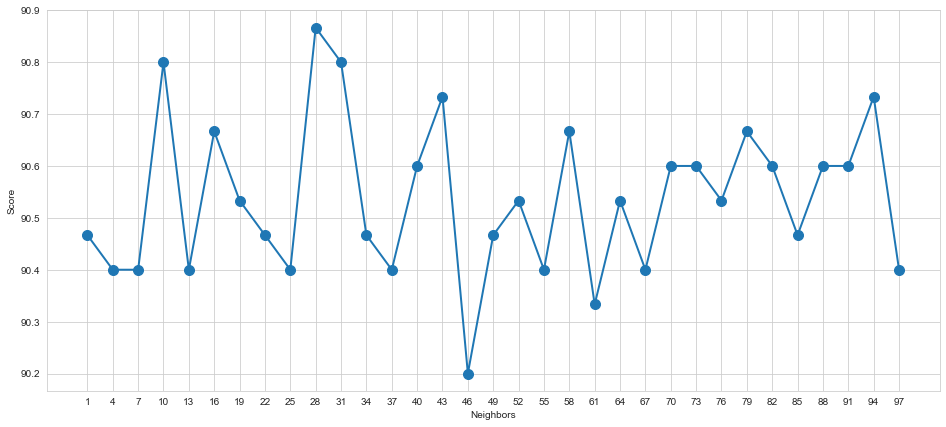

In [63]:
plt.figure(figsize=(16,7))
plt.plot(range(1,100,3), scores2, lw=2, marker='o',markersize=10)
plt.xlabel('Neighbors')
plt.ylabel('Score')
plt.xticks(range(1,100,3))
# plt.yticks(range(0,101,5))
plt.show()

In [64]:
# Elbow Method
scores21 = [100*(KNeighborsClassifier(n_neighbors=i).fit(xtrain21, ytrain21).score(xtest21,ytest21)) for i in range(1,100,3)]

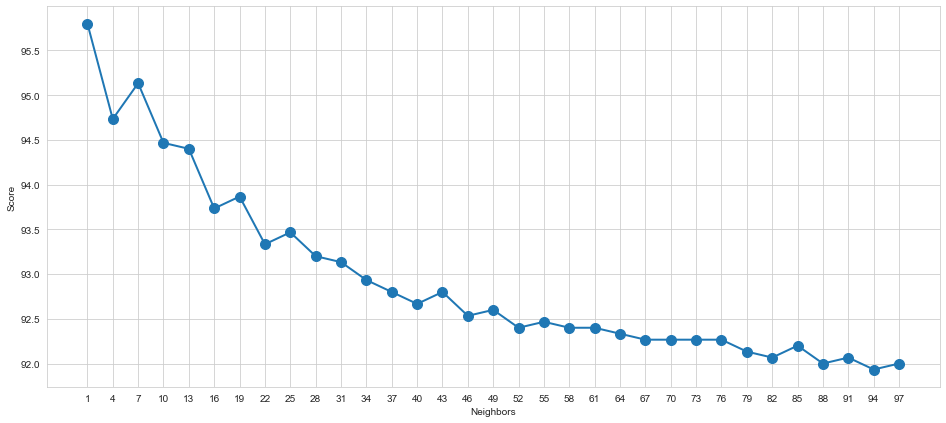

In [65]:
plt.figure(figsize=(16,7))
plt.plot(range(1,100,3), scores21, lw=2, marker='o',markersize=10)
plt.xlabel('Neighbors')
plt.ylabel('Score')
plt.xticks(range(1,100,3))
# plt.yticks(range(0,101,5))
plt.show()

### SVM

In [66]:
xtrain1.head(2)

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Securities_Account,CD_Account,Online,CreditCard
1309,38,14,71,4,2.0,3,0,0,0,0,0
1702,56,30,122,2,0.5,1,0,0,0,0,1


In [67]:
xtrain2.head(2)

,Age,Income,CCAvg,Mortgage,Securities_Account,CD_Account,Online,CreditCard,Family_1,Family_2,Family_3,Family_4,Education_1,Education_2,Education_3
1309,38,71,2.0,0,0,0,0,0,0,0,0,1,0,0,1
1702,56,122,0.5,0,0,0,0,1,0,1,0,0,1,0,0


In [68]:
xtrain21.head(2)

,Age,Income,CCAvg,Mortgage,Securities_Account,CD_Account,Online,CreditCard,Family_1,Family_2,Family_3,Family_4,Education_1,Education_2,Education_3
1309,-0.640236,-0.060271,0.035515,-0.555524,-0.341423,-0.25354,-1.216618,-0.645314,-0.645936,-0.591517,-0.503123,1.758310,-0.849566,-0.624538,1.526798
1702,0.930168,1.047724,-0.822862,-0.555524,-0.341423,-0.25354,-1.216618,1.549632,-0.645936,1.690569,-0.503123,-0.568728,1.177071,-0.624538,-0.654965


In [69]:
model_svm2 = SVC().fit(xtrain2,ytrain2)
round(100*model_svm2.score(xtest2,ytest2),2)

90.73

In [70]:
model_svm21 = SVC().fit(xtrain21,ytrain21)
round(100*model_svm21.score(xtest21,ytest21),2)

97.53

In [71]:
params = {'C':[0.01,0.1,1,10,100,1000,10000], 'kernel':['linear','rbf','poly','sigmoid'],'gamma':['auto','scale',100,10,1,0.1,0.001,0.0001,0.00001]}

In [72]:
model_svm21_hpt = SVC(C=100,kernel='linear',gamma=0.01).fit(xtrain21,ytrain21)
round(100*model_svm21_hpt.score(xtest21,ytest21),2)

96.2

In [73]:
# {'C': 10000, 'gamma': 0.001, 'kernel': 'rbf'}

### DecisionTree

In [74]:
model_dt_2 = DecisionTreeClassifier().fit(xtrain2,ytrain2)
print(round(100*model_dt_2.score(xtest2,ytest2),2))

97.33


In [75]:
model_dt_21 = DecisionTreeClassifier().fit(xtrain21,ytrain21)
print(round(100*model_dt_21.score(xtest21,ytest21),2))

97.4


In [80]:
feats1 = xtrain1.columns
feats1

Index(['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Education',
       'Mortgage', 'Securities_Account', 'CD_Account', 'Online', 'CreditCard'],
      dtype='object')

In [81]:
feats2 = xtrain2.columns
feats21 = xtrain21.columns

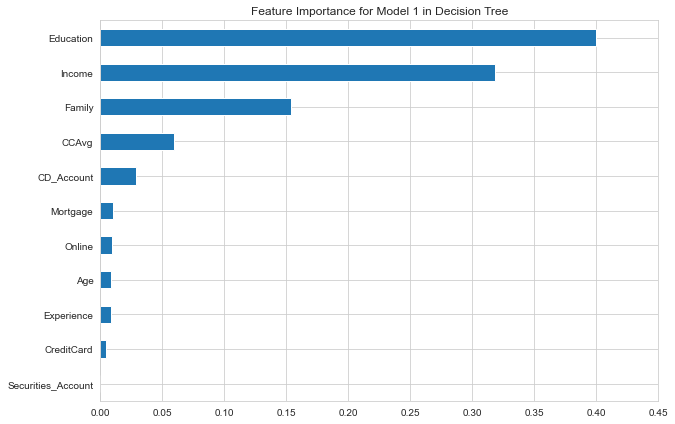

In [89]:
plt.figure(figsize = (10,7))
pd.Series(model_dt.feature_importances_, index=feats1).sort_values().plot.barh()
plt.xticks(np.arange(0,0.5,0.05))
plt.title('Feature Importance for Model 1 in Decision Tree')
plt.show()

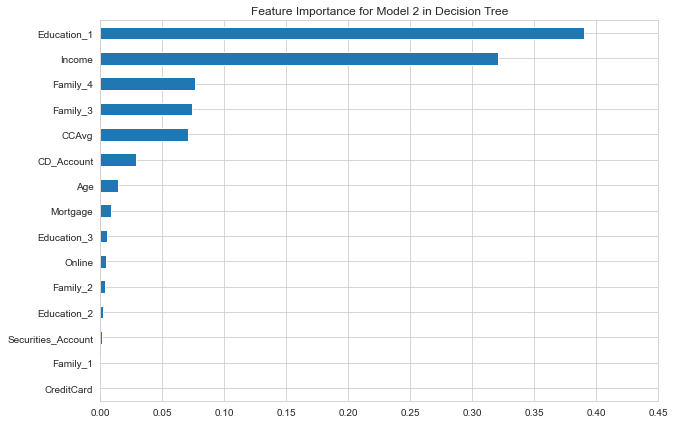

In [90]:
plt.figure(figsize = (10,7))
pd.Series(model_dt_2.feature_importances_, index=feats2).sort_values().plot.barh()
plt.xticks(np.arange(0,0.5,0.05))
plt.title('Feature Importance for Model 2 in Decision Tree')
plt.show()

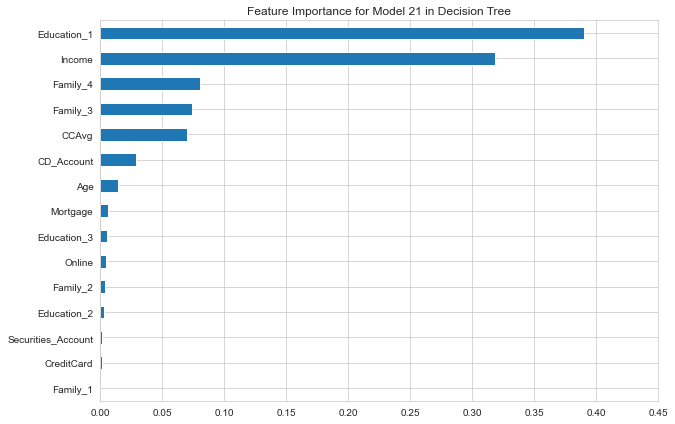

In [91]:
plt.figure(figsize = (10,7))
pd.Series(model_dt_21.feature_importances_, index=feats21).sort_values().plot.barh()
plt.xticks(np.arange(0,0.5,0.05))
plt.title('Feature Importance for Model 21 in Decision Tree')
plt.show()

In [92]:
model_dt_11 = DecisionTreeClassifier().fit(xtrain1.drop(['Age','Experience','Mortgage','Online','CreditCard','Securities_Account'],axis=1),ytrain1)
print(round(100*model_dt_11.score(xtest1.drop(['Age','Experience','Mortgage','Online','CreditCard','Securities_Account'],axis=1),ytest1),2))

97.87


In [97]:
pd.Series(model_dt_2.feature_importances_, index=feats2).sort_values(ascending=False).index

Index(['Education_1', 'Income', 'Family_4', 'Family_3', 'CCAvg', 'CD_Account',
       'Age', 'Mortgage', 'Education_3', 'Online', 'Family_2', 'Education_2',
       'Securities_Account', 'CreditCard', 'Family_1'],
      dtype='object')

In [98]:
model_dt_2_1 = DecisionTreeClassifier().fit(xtrain2.drop(['Age', 'Mortgage', 'Education_3', 'Online', 'Family_2', 'Education_2',
       'Securities_Account', 'CreditCard', 'Family_1'],axis=1),ytrain2)
print(round(100*model_dt_2_1.score(xtest2.drop(['Age', 'Mortgage', 'Education_3', 'Online', 'Family_2', 'Education_2',
       'Securities_Account', 'CreditCard', 'Family_1'],axis=1),ytest2),2))

97.6


In [99]:
model_dt_21_1 = DecisionTreeClassifier().fit(xtrain21.drop(['Age', 'Mortgage', 'Education_3', 'Online', 'Family_2', 'Education_2',
       'Securities_Account', 'CreditCard', 'Family_1'],axis=1),ytrain21)
print(round(100*model_dt_21_1.score(xtest21.drop(['Age', 'Mortgage', 'Education_3', 'Online', 'Family_2', 'Education_2',
       'Securities_Account', 'CreditCard', 'Family_1'],axis=1),ytest21),2))

97.6


In [100]:
feats11 = xtrain1.drop(['Age','Experience','Mortgage','Online','CreditCard','Securities_Account'],axis=1).columns
feats2_1 = xtrain2.drop(['Age', 'Mortgage', 'Education_3', 'Online', 'Family_2', 'Education_2',
       'Securities_Account', 'CreditCard', 'Family_1'],axis=1).columns
feats21_1 = feats2_1

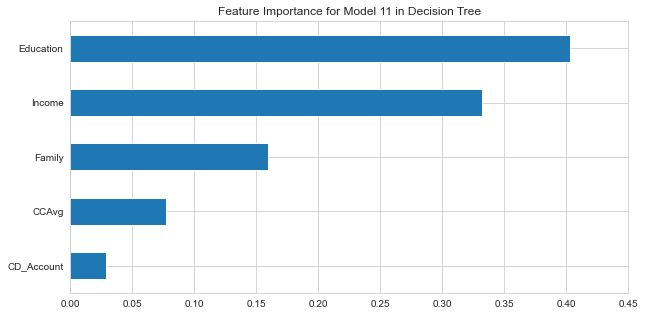

In [102]:
plt.figure(figsize = (10,5))
pd.Series(model_dt_11.feature_importances_, index=feats11).sort_values().plot.barh()
plt.xticks(np.arange(0,0.5,0.05))
plt.title('Feature Importance for Model 11 in Decision Tree')
plt.show()

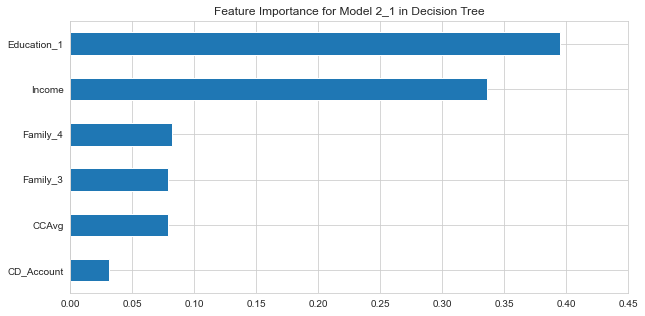

In [103]:
plt.figure(figsize = (10,5))
pd.Series(model_dt_2_1.feature_importances_, index=feats2_1).sort_values().plot.barh()
plt.xticks(np.arange(0,0.5,0.05))
plt.title('Feature Importance for Model 2_1 in Decision Tree')
plt.show()

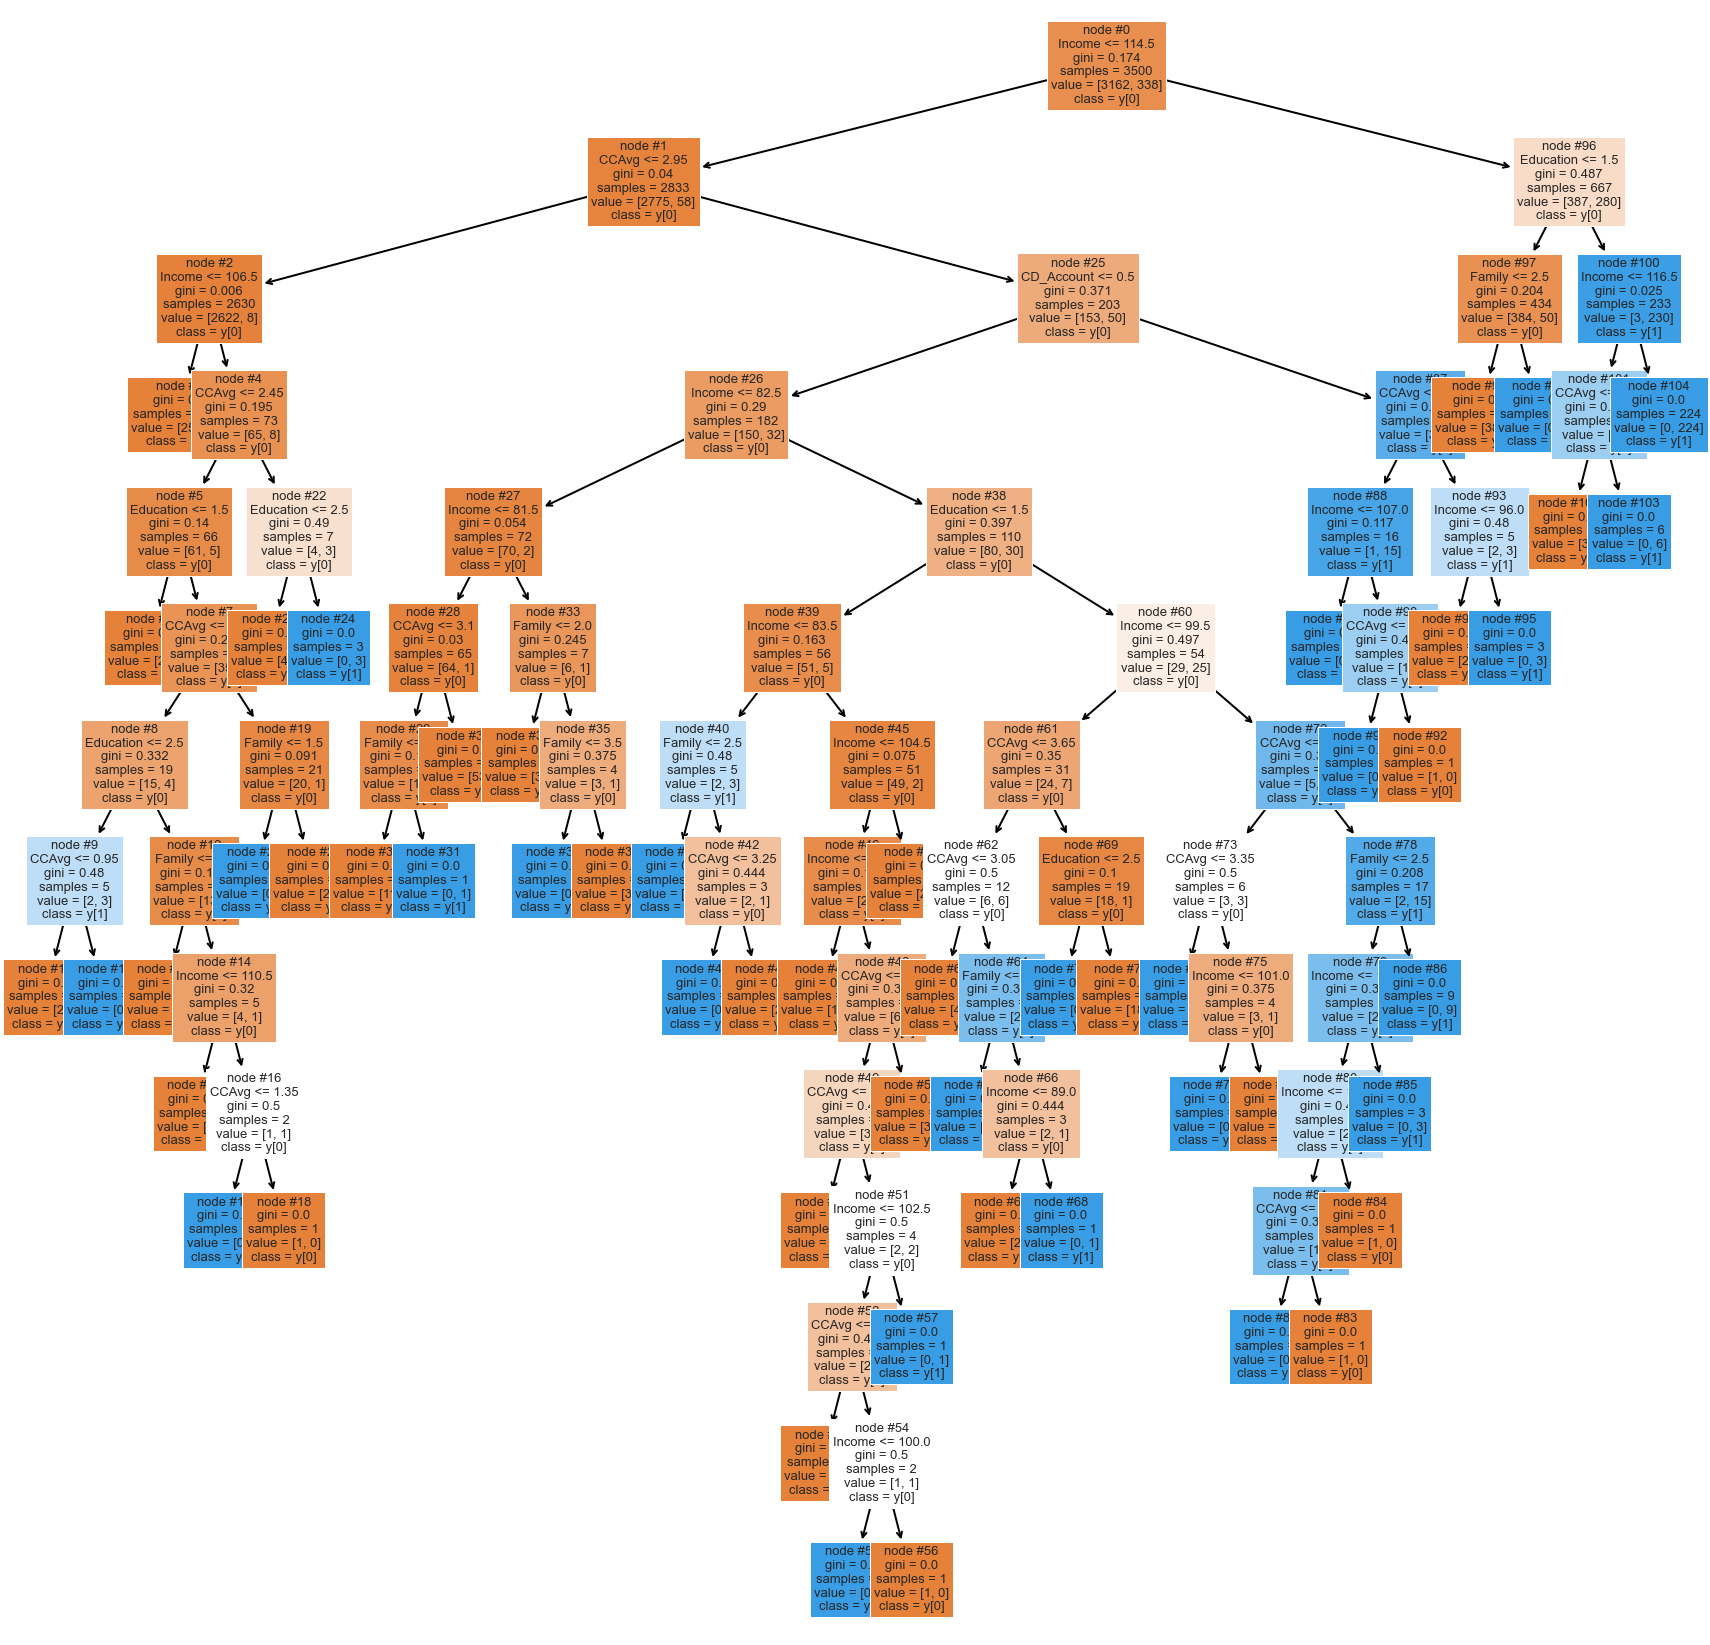

In [109]:
plt.figure(figsize=(30,30))
dt1_1 = tree.plot_tree(model_dt_11, feature_names = feats11, filled = True, fontsize=13, node_ids=True, class_names=True)
for tt in dt1_1:
    arrow = tt.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(2)
plt.show()

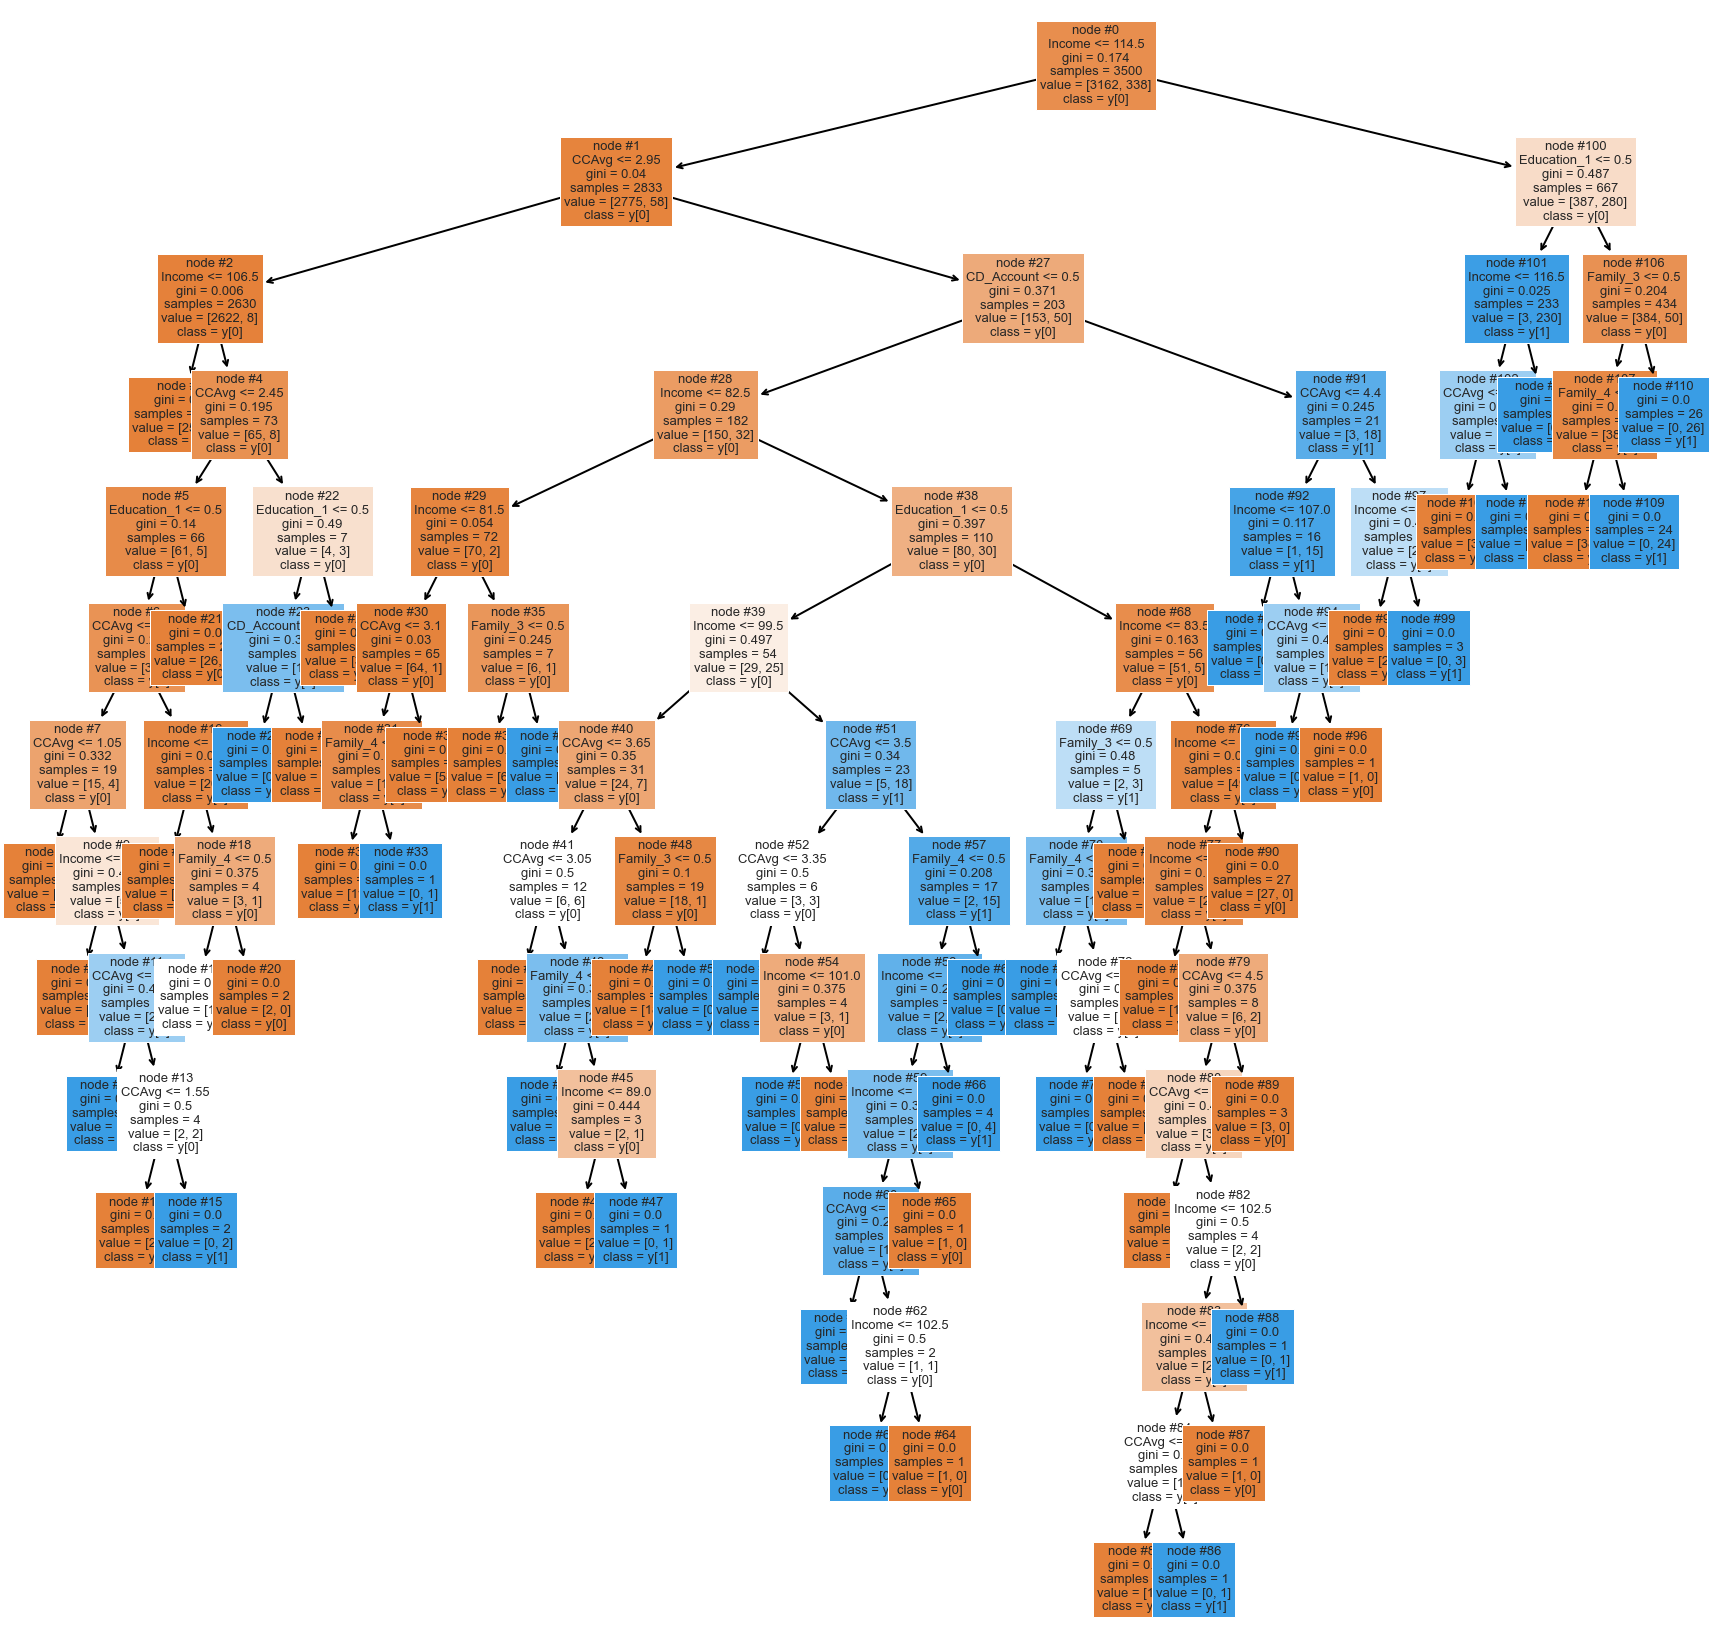

In [111]:
plt.figure(figsize=(30,30))
dt2_1 = tree.plot_tree(model_dt_2_1, feature_names = feats2_1, filled = True, fontsize=13, node_ids=True, class_names=True)
for tt in dt2_1:
    arrow = tt.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(2)
plt.show()

In [114]:
params_dt = {'criterion':['gini','entropy'],
             'max_depth':range(1,10), 
            #'min_sample_leaf':[1,2,5,7,10,15],
            'max_leaf_nodes' : [5,10,15,20,25],
            }

In [115]:
model_grid_dt1 = GridSearchCV(DecisionTreeClassifier(),param_grid = params_dt, verbose=3).fit(xtrain1.drop(['Age','Experience','Mortgage','Online','CreditCard','Securities_Account'],axis=1), ytrain1)

Fitting 5 folds for each of 90 candidates, totalling 450 fits
[CV 1/5] END criterion=gini, max_depth=1, max_leaf_nodes=5;, score=0.904 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=1, max_leaf_nodes=5;, score=0.904 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=1, max_leaf_nodes=5;, score=0.903 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=1, max_leaf_nodes=5;, score=0.903 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=1, max_leaf_nodes=5;, score=0.903 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=1, max_leaf_nodes=10;, score=0.904 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=1, max_leaf_nodes=10;, score=0.904 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=1, max_leaf_nodes=10;, score=0.903 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=1, max_leaf_nodes=10;, score=0.903 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=1, max_leaf_nodes=10;, score=0.903 total time=   0.0s
[CV 1/5] END 

In [116]:
model_grid_dt1.best_params_

{'criterion': 'gini', 'max_depth': 8, 'max_leaf_nodes': 15}

In [120]:
model_grid_dt1.best_score_*100

99.0

In [119]:
100*model_grid_dt1.score(xtest1.drop(['Age','Experience','Mortgage','Online','CreditCard','Securities_Account'],axis=1),ytest1)

97.86666666666667

### Random Forest

In [121]:
params_rf = {'criterion':['gini','entropy'],
             'max_depth':range(1,10), 
            'n_estimators' : range(10,200,10),
            'max_leaf_nodes' : [5,10,15,20,25],
            }

In [122]:
model_grid_rf1 = GridSearchCV(RandomForestClassifier(),param_grid = params_rf, verbose=3).fit(xtrain1.drop(['Age','Experience','Mortgage','Online','CreditCard','Securities_Account'],axis=1), ytrain1)

Fitting 5 folds for each of 1710 candidates, totalling 8550 fits
[CV 1/5] END criterion=gini, max_depth=1, max_leaf_nodes=5, n_estimators=10;, score=0.904 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=1, max_leaf_nodes=5, n_estimators=10;, score=0.904 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=1, max_leaf_nodes=5, n_estimators=10;, score=0.903 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=1, max_leaf_nodes=5, n_estimators=10;, score=0.903 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=1, max_leaf_nodes=5, n_estimators=10;, score=0.903 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=1, max_leaf_nodes=5, n_estimators=20;, score=0.904 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=1, max_leaf_nodes=5, n_estimators=20;, score=0.904 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=1, max_leaf_nodes=5, n_estimators=20;, score=0.903 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=1, max_leaf_nodes=5, n_e

In [123]:
model_grid_rf1.best_params_

{'criterion': 'entropy',
 'max_depth': 6,
 'max_leaf_nodes': 20,
 'n_estimators': 40}

In [124]:
model_grid_rf1.best_score_*100

99.0

In [125]:
100*model_grid_rf1.score(xtest1.drop(['Age','Experience','Mortgage','Online','CreditCard','Securities_Account'],axis=1),ytest1)

97.6